#### Kunal Kishore || 22810041

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns


### Step 1: Data Preprocessing
Replace 1 with 0 and 2 with 1 in the 'default' column



In [2]:
# Load the dataset
df = pd.read_csv("credit-default.csv")
df.shape

(1000, 21)

In [3]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [4]:
df['default'].head()

0    1
1    2
2    1
3    1
4    2
Name: default, dtype: int64

In [5]:
# Replace 1 with 0 and 2 with 1 in the 'default' column
df['default'] = df['default'].replace({1: 0, 2: 1})


In [6]:
df["default"].head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

### Step 2.Data Summarization
Summarize the dataset using various summarization techniques


In [7]:
#Basic Statistics
df.describe()


,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,default,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,0.300000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.458487,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,0.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,0.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,0.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,1.000000,2.000000


In [8]:
#Datatypes
df.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_length       object
installment_rate         int64
personal_status         object
other_debtors           object
residence_history        int64
property                object
age                      int64
installment_plan        object
housing                 object
existing_credits         int64
default                  int64
dependents               int64
telephone               object
foreign_worker          object
job                     object
dtype: object

In [9]:
#Null value count
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
default                 0
dependents              0
telephone               0
foreign_worker          0
job                     0
dtype: int64

In [10]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)



                      months_loan_duration    amount  installment_rate  \
months_loan_duration              1.000000  0.624984          0.074749   
amount                            0.624984  1.000000         -0.271316   
installment_rate                  0.074749 -0.271316          1.000000   
residence_history                 0.034067  0.028926          0.049302   
age                              -0.036136  0.032716          0.058266   
existing_credits                 -0.011284  0.020795          0.021669   
default                           0.214927  0.154739          0.072404   
dependents                       -0.023834  0.017142         -0.071207   

                      residence_history       age  existing_credits   default  \
months_loan_duration           0.034067 -0.036136         -0.011284  0.214927   
amount                         0.028926  0.032716          0.020795  0.154739   
installment_rate               0.049302  0.058266          0.021669  0.072404   
residence

C:\Users\Kunal\AppData\Local\Temp\ipykernel_20040\2146307794.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


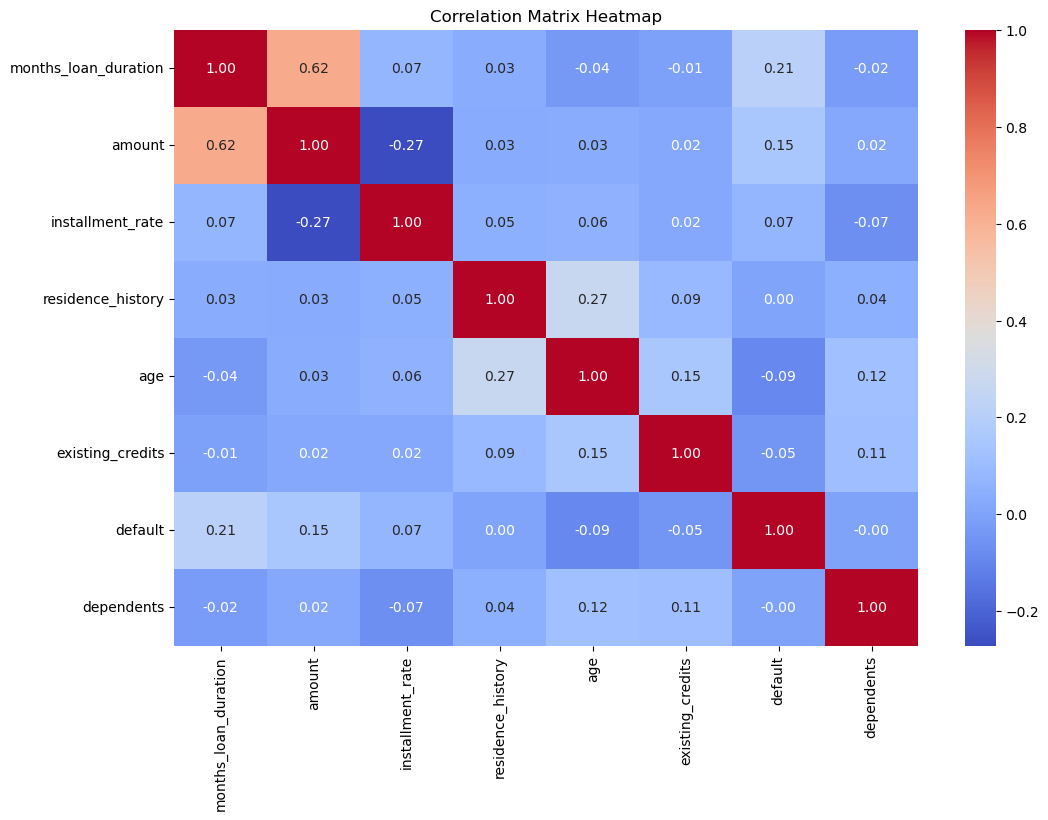

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


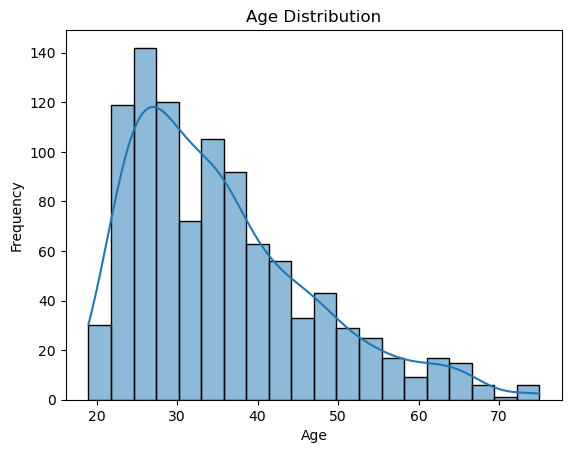

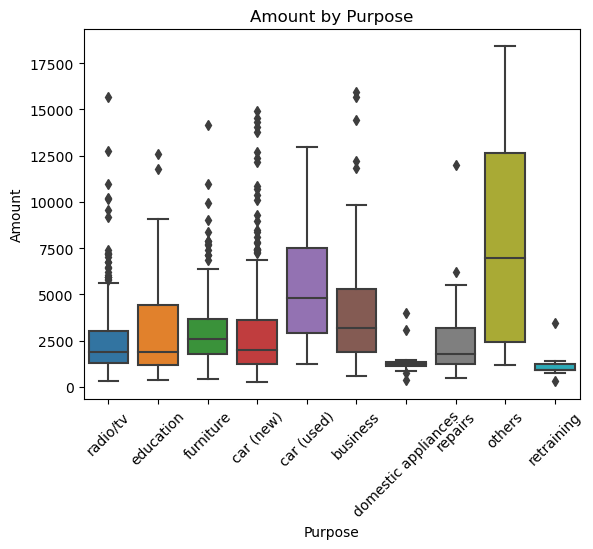

In [12]:
#Data Visualization

# Histogram of 'age'
sns.histplot(df['age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# Box plot of 'amount' by 'purpose'
sns.boxplot(x='purpose', y='amount', data=df)
plt.xlabel('Purpose')
plt.ylabel('Amount')
plt.title('Amount by Purpose')
plt.xticks(rotation=45)
plt.show()


In [13]:
# Summary statistics by target
default_summary = df.groupby('default').agg({'amount': ['mean', 'median'], 'age': ['mean', 'median']})

default_summary


amount                age       
                mean  median       mean median
default                                       
0        2985.457143  2244.0  36.224286   34.0
1        3938.126667  2574.5  33.963333   31.0

### Step 3: Check Target Balance
Identify whether the target column is balanced or imbalanced. Plot the same using a simple pie chart.


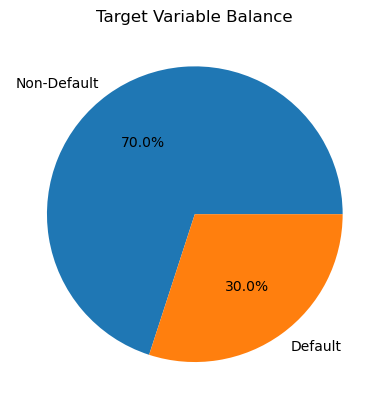

In [14]:
target_counts = df['default'].value_counts()
plt.pie(target_counts, labels=['Non-Default', 'Default'], autopct='%1.1f%%')
plt.title('Target Variable Balance')
plt.show()


### Step 4: Exploratory Data Analysis 
Perform exploratory data analysis to identify which factors differentiate/influences customers who are
defaulting with others.

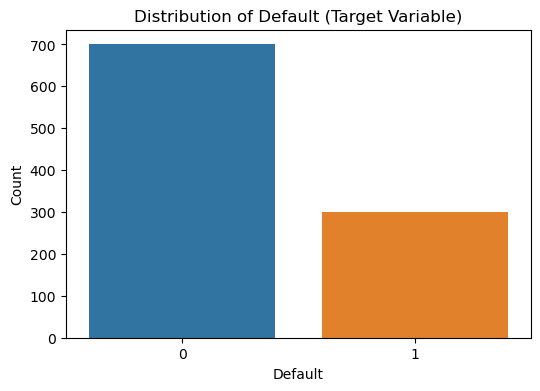

In [15]:
# 4.1. Visualize the distribution of the target variable (default)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='default')
plt.title('Distribution of Default (Target Variable)')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()



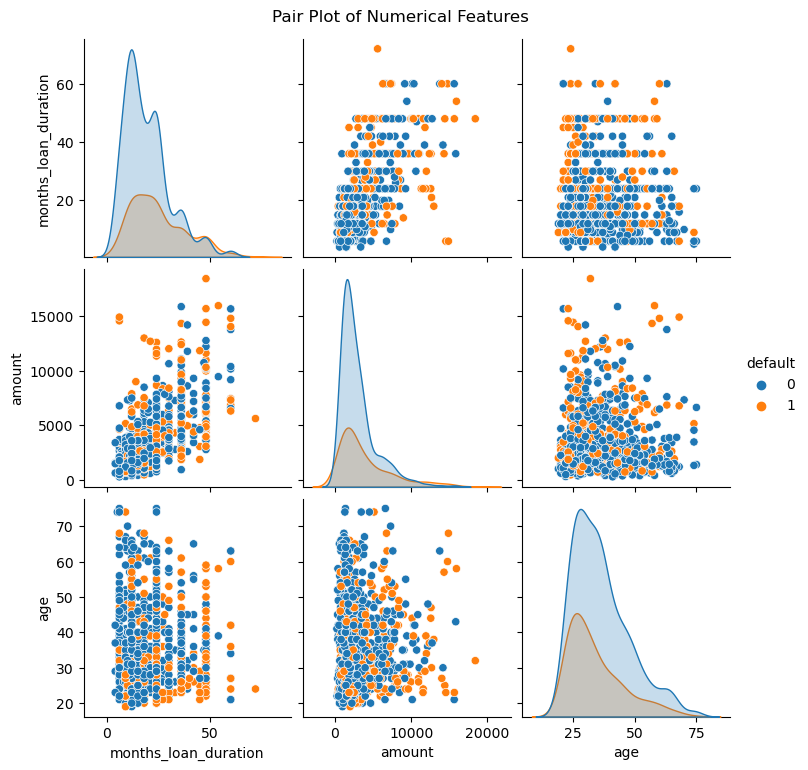

In [16]:
# 4.2. Explore numerical features
numerical_cols = ['months_loan_duration', 'amount', 'age']

# Pair plot for numerical features
sns.pairplot(data=df, hue='default', vars=numerical_cols, diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()



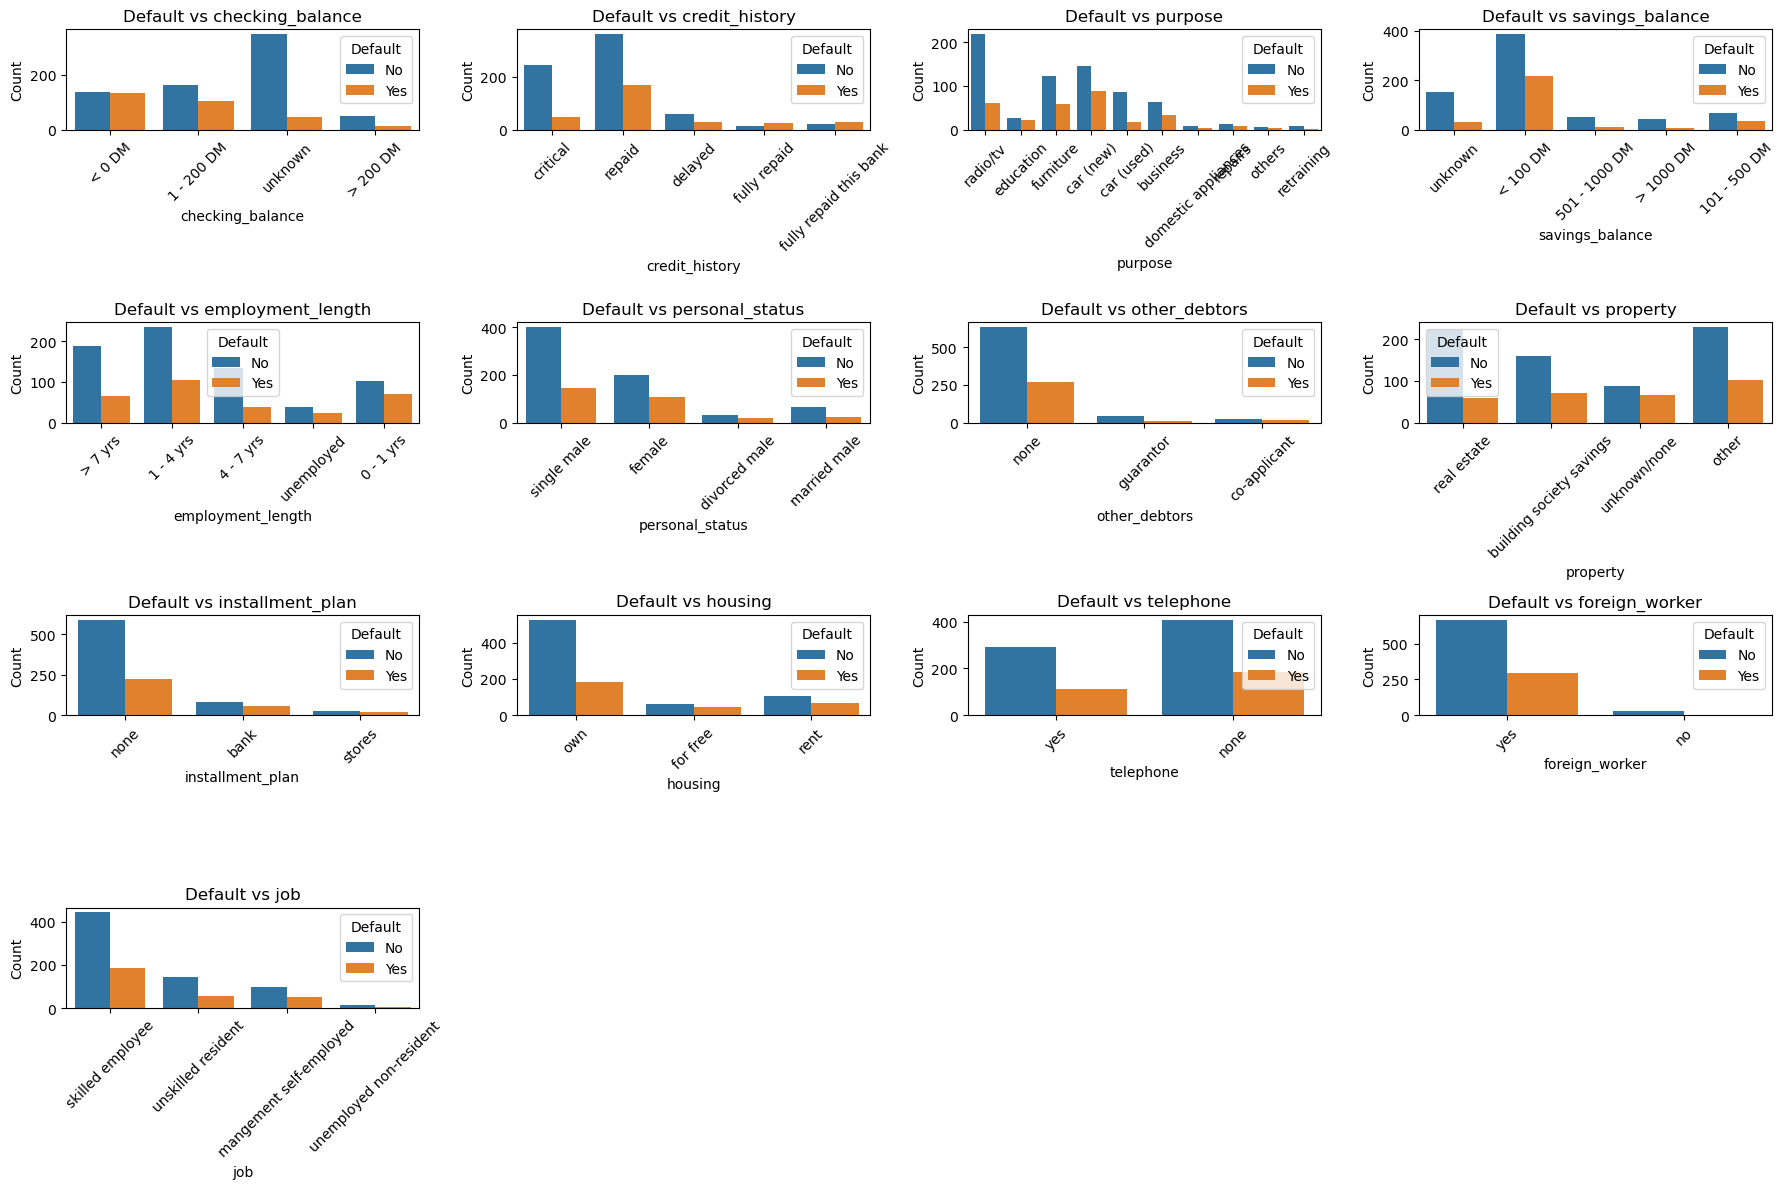

In [17]:
# 4.3. Explore categorical features
categorical_cols = ['checking_balance', 'credit_history', 'purpose', 'savings_balance',
                    'employment_length', 'personal_status', 'other_debtors', 'property',
                    'installment_plan', 'housing', 'telephone', 'foreign_worker', 'job']

# Count plots for categorical features
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols, start=1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=col, hue='default')
    plt.title(f'Default vs {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Default', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()



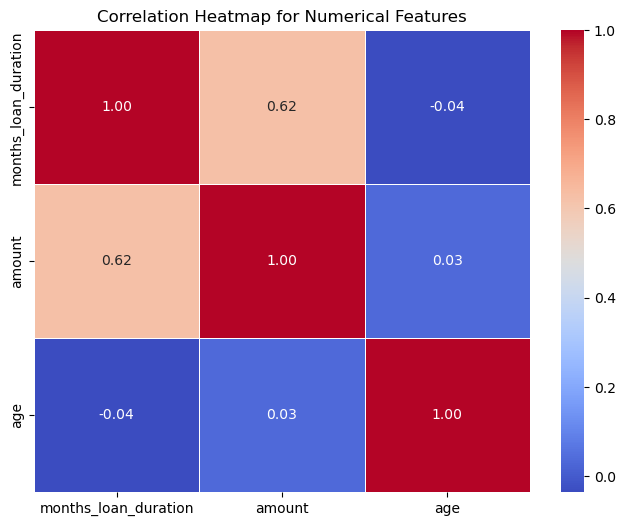

In [18]:
# 4.4. Correlation heatmap between numerical features
plt.figure(figsize=(8, 6))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()


### Step 5: Data Encoding
Convert all categorical columns to numerical columns using one hot encoding (i.e. using dummy
variables technique).

In [19]:
#Datatypes
df.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_length       object
installment_rate         int64
personal_status         object
other_debtors           object
residence_history        int64
property                object
age                      int64
installment_plan        object
housing                 object
existing_credits         int64
default                  int64
dependents               int64
telephone               object
foreign_worker          object
job                     object
dtype: object

In [20]:
# Group categorical features
categorical_features = df.select_dtypes(include=['object']).columns

categorical_data = df[categorical_features]
categorical_counts = categorical_data.nunique()
print("\nCategorical Features Counts:")
print(categorical_counts)


Categorical Features Counts:
checking_balance      4
credit_history        5
purpose              10
savings_balance       5
employment_length     5
personal_status       4
other_debtors         3
property              4
installment_plan      3
housing               3
telephone             2
foreign_worker        2
job                   4
dtype: int64


In [21]:
data_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)


In [22]:
data_encoded.head()

,months_loan_duration,amount,installment_rate,residence_history,age,existing_credits,default,dependents,checking_balance_< 0 DM,checking_balance_> 200 DM,...,property_unknown/none,installment_plan_none,installment_plan_stores,housing_own,housing_rent,telephone_yes,foreign_worker_yes,job_skilled employee,job_unemployed non-resident,job_unskilled resident
0,6,1169,4,4,67,2,0,1,1,0,...,0,1,0,1,0,1,1,1,0,0
1,48,5951,2,2,22,1,1,1,0,0,...,0,1,0,1,0,0,1,1,0,0
2,12,2096,2,3,49,1,0,2,0,0,...,0,1,0,1,0,0,1,0,0,1
3,42,7882,2,4,45,1,0,2,1,0,...,0,1,0,0,0,0,1,1,0,0
4,24,4870,3,4,53,2,1,2,1,0,...,1,1,0,0,0,0,1,1,0,0


### Step 6: Data Splitting
Divide the dataset in to training (80%) and testing (20%). (Use random state=1)


In [23]:
X = data_encoded.drop('default', axis=1)
y = data_encoded['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


### Step 7: Model Building
Use the Logistic Regression to build a classifier. Make sure that you include only those variables which
are significant (use trial and error method for the same).

In [24]:
feature_selection_model  = LogisticRegression()
feature_selection_model .fit(X_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
# Fit the feature selection model on the training data
feature_selection_model.fit(X_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
feature_selection_model.coef_

array([[ 1.98370648e-02,  1.31014888e-04,  4.12676110e-01,
        -3.02836223e-02, -3.03184760e-02, -2.72966803e-01,
        -9.50123522e-02,  7.13831684e-01, -3.78343563e-02,
        -1.02031246e+00, -1.23729094e-02,  2.13679721e-01,
         1.62268007e-01,  6.82876525e-02,  3.57126272e-01,
        -3.73963961e-01,  1.81910989e-02,  7.20350066e-02,
        -1.13474849e-02,  2.66852065e-04, -3.53936048e-01,
         5.50821493e-02, -1.39363631e-02, -8.91052969e-02,
         4.20014935e-01, -1.52877073e-01, -3.40539642e-01,
        -4.23518726e-02, -3.00186441e-01, -4.74933046e-02,
         4.57856160e-02,  8.33550410e-02, -5.51711160e-02,
        -2.72210256e-01, -1.03796222e-01, -1.66892143e-01,
        -1.18123075e-01, -2.43983900e-01,  2.15296747e-01,
        -3.94672135e-01,  6.00437582e-02, -4.36944932e-01,
         1.33251315e-01, -2.46805404e-01, -7.15790099e-02,
        -1.97565929e-01,  1.11515652e-02,  2.13894372e-04]])

In [27]:
# Use the trained model to get feature importances or coefficients
feature_importances = abs(feature_selection_model.coef_[0])

# Set a threshold to select significant features
threshold = 0.001  # Adjust this threshold as needed
                  # this threshold value was selected via trial and error 

# Select significant features based on the threshold
selected_features = X_train.columns[feature_importances > threshold]


In [28]:
# Filter the training and testing data to include only significant features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [29]:
# Build a logistic regression classifier using the selected features
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_selected, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Step 8: Model Evaluation
Obtain the classification report.

In [30]:
y_pred = logistic_regression_model.predict(X_test_selected)


In [31]:
print(y_pred)
print(y_test)

[0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
507    1
818    0
452    0
368    1
242    1
      ..
430    0
874    0
550    0
608    0
207    0
Name: default, Length: 200, dtype: int64


In [32]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = confusion_matrix(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))
  
print ("Confusion Matrix : \n", cm)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       141
           1       0.69      0.46      0.55        59

    accuracy                           0.78       200
   macro avg       0.75      0.69      0.70       200
weighted avg       0.77      0.78      0.76       200

Confusion Matrix : 
 [[129  12]
 [ 32  27]]


In [33]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.78
